In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import requests
import io
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
print("Librerias Importadas")

Librerias Importadas


In [71]:
df = pd.read_csv('Datos.csv')
df.head()

,Ndia,Fecha,Ncasos,Ctotales,Mtotales
0,1,29 de febrero,1,1,0
1,2,1 de marzo,5,6,0
2,3,2 de marzo,0,6,0
3,4,3 de marzo,5,11,0
4,5,4 de marzo,3,14,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ndia      49 non-null     int64 
 1   Fecha     49 non-null     object
 2   Ncasos    49 non-null     int64 
 3   Ctotales  49 non-null     int64 
 4   Mtotales  49 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.0+ KB


In [47]:
df = df.loc[:,['Ndia','Ctotales']]
df

,Ndia,Ctotales
0,1,1
1,2,6
2,3,6
3,4,11
4,5,14
5,6,14
6,7,14
7,8,14
8,9,15
9,10,15


In [48]:
x=list(df.iloc[:,0])
y=list(df.iloc[:,1])
def funcion(x,a,b):
    return a*np.exp(b*x)
val=curve_fit( funcion,  x,  y)
print(val)
pred_x = list(range(min(x),max(x)+50))

(array([1.81189089e-14, 9.99999994e-01]), array([[ 9.20067742e-26, -1.12538256e-20],
       [-1.12538256e-20,  1.37661821e-15]]))


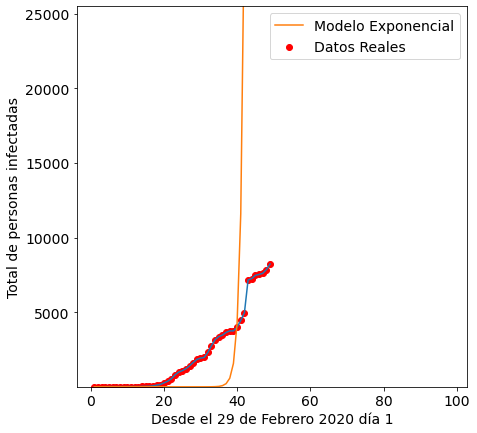

In [49]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(df.loc[:,['Ndia']], df.loc[:,['Ctotales']])
plt.plot(pred_x, [funcion(i,val[0][0],val[0][1]) for i in pred_x], label="Modelo Exponencial" )
plt.legend()
plt.xlabel("Desde el 29 de Febrero 2020 día 1")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1))
plt.show()

In [50]:
xx= df['Ndia']
yy= df['Ctotales']
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.25) 
X_train=X_train.values.reshape([X_train.values.shape[0],1])
X_test=X_test.values.reshape([X_test.values.shape[0],1])

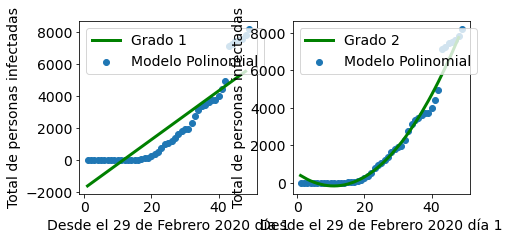

In [51]:
titulos=["Grado 0 ", "Grado 1", "Grado 2"]
for i in range(1,3):
    
    poli_reg=PolynomialFeatures(degree=i)
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_p = poli_reg.fit_transform(X_test)
    pr = linear_model.LinearRegression()
    pr.fit(X_train_poli, y_train)
    Y_predic = pr.predict(X_train_poli)
    xt,yt=zip(*sorted(zip(X_train,Y_predic)))
    plt.subplot(2,2,i)
    
    plt.xlabel("Desde el 29 de Febrero 2020 día 1")
    plt.ylabel("Total de personas infectadas")
    plt.plot(xt, yt, color='green', label=titulos[i], lineWidth=3)
    plt.scatter(xx,yy, label="Modelo Polinomial")
    plt.legend(loc=2)
plt.rcParams['figure.figsize'] = [9, 9]
plt.show()

In [52]:
df1 = pd.read_csv('DatosActual.csv')
df1.sample(5)

,date,confirmed,deaths,recovered,day,Totales
256,12 de noviembre de 2020,177513,12946,154956,316,345415
182,30 de agosto de 2020,113648,6555,101620,242,221823
156,4 de agosto de 2020,87963,5808,70985,216,164756
288,14 de diciembre de 2020,202180,13875,177951,348,394006
343,7 de febrero de 2021,258282,15012,220398,403,493692


In [53]:
df1.describe()

,confirmed,deaths,recovered,day,Totales
count,409.000000,409.000000,409.000000,409.000000,409.000000
mean,138729.068460,8962.623472,112527.051345,264.000000,260218.743276
std,101361.857858,5802.934111,92628.686670,118.212379,199352.825650
min,6.000000,0.000000,0.000000,60.000000,6.000000
25%,44440.000000,3720.000000,21862.000000,162.000000,70022.000000
50%,126711.000000,11095.000000,102852.000000,264.000000,240658.000000
75%,213378.000000,14051.000000,184507.000000,366.000000,411936.000000
max,347589.000000,17351.000000,298604.000000,468.000000,663544.000000


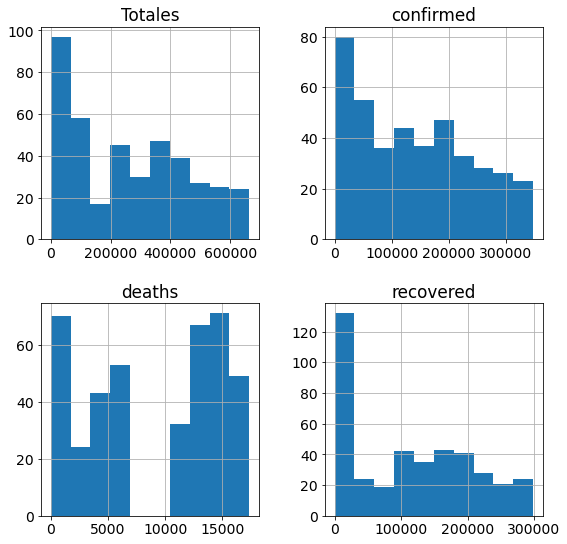

In [54]:
df1.drop(['day'],1).hist()
plt.show()

In [55]:
df1=df1[['day','Totales']]
df1

,day,Totales
0,60,6
1,61,6
2,62,7
3,63,10
4,64,13
...,...,...
404,464,650150
405,465,652466
406,466,654424
407,467,654682


In [56]:
df1.describe()

,day,Totales
count,409.000000,409.000000
mean,264.000000,260218.743276
std,118.212379,199352.825650
min,60.000000,6.000000
25%,162.000000,70022.000000
50%,264.000000,240658.000000
75%,366.000000,411936.000000
max,468.000000,663544.000000


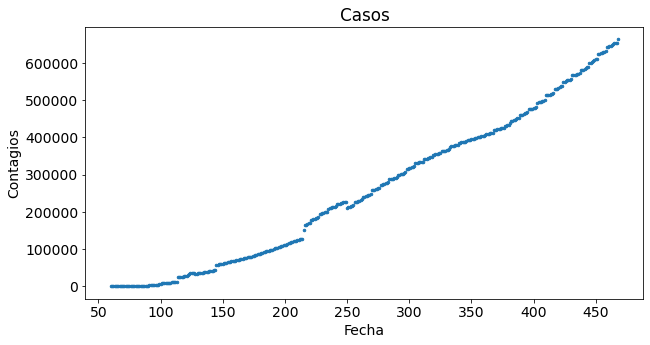

In [57]:
import numpy as np  
import matplotlib.pyplot as plt  

plt.figure(figsize = (10,5))
x = df1['day'].values.reshape(-1,1)
y = df1['Totales'].values.reshape(-1,1)
plt.plot(x, y,'.', markersize = 5, label ='')
plt.title('Casos')  
plt.xlabel('Fecha')  
plt.ylabel('Contagios') 

plt.show()

In [58]:
#X = df.iloc[:, :-1].values  
#y = df.iloc[:, 1].values
x = df1['day'].values.reshape(-1,1)
y = df1['Totales'].values.reshape(-1,1)

In [59]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [60]:
#Training: Regresion Lineal
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [61]:
#Making Predictions: Regresion Lineal
y_pred = regressor.predict(X_test)  
#y_pred es una matriz numpy que contiene todos los valores predichos para los valores de entrada en la serie X_test
#Comparacion manual
df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) 
#Aunque nuestro modelo no es muy preciso, los porcentajes predichos son cercanos a los reales.
df3 

,Actual,Predicted
0,199368,205507.444961
1,107832,146601.158377
2,95461,128087.754022
3,64471,74230.577716
4,36179,37203.769006
...,...,...
77,127101,171846.709770
78,13,-75559.693884
79,9026,-8238.223502
80,63871,72547.540957


In [62]:
Y_pred = regressor.predict(X_test)

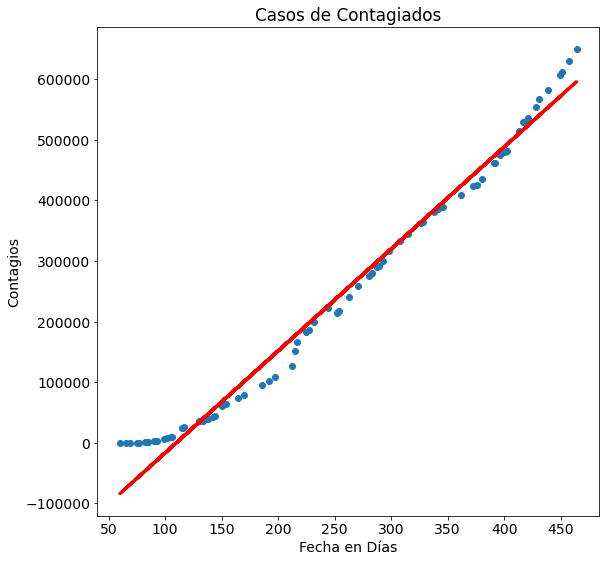

In [66]:
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Casos de Contagiados')
plt.xlabel('Fecha en Días')
plt.ylabel('Contagios')
plt.show()

In [68]:
print('Precisión del modelo:')
print(regressor.score(X_train, y_train))

Precisión del modelo:
0.9818934154919363
